# OpenFace Performance


## Description

[OpenFace's (MobileNet)](https://github.com/cmusatyalab/openface) on [Labeled Faces in the Wild dataset](http://vis-www.cs.umass.edu/lfw/).

Running the net on an image generates a 128-D embedding. We take squared distance between these, manually select a threshold, and consider all distances below this to be a match.

## Accuracy 


#### False positives

318464.0 false positives across the entire dataset of 13233 people -- i.e.  0.2% of results. Examples below.

#### False negatives

236630.0 false negatives across the entire dataset of 13233 people -- i.e.  0.1% of results. Examples below.

#### Time 

Time taken to compute mutual vector distance between each face vector pairs is 2.0e-08 seconds, (this is not a limiting metric).


### 1. Manually inspect numerical face embeddings

In [16]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("reps.csv", header=None) 
labels = pd.read_csv("labels.csv", header=None) 
# Preview the first 5 lines of the loaded embedding data 
data.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.040225,0.322060,0.156887,0.048445,-0.049858,0.167681,-0.010151,0.032351,-0.038951,0.070092,...,0.055995,0.038389,0.061776,-0.014247,0.013799,0.094298,0.234932,-0.044936,0.166066,-0.092905
1,0.021137,0.119240,-0.215697,-0.113089,-0.021141,0.117880,-0.090001,-0.064246,-0.141700,0.095237,...,0.044473,-0.044571,0.010168,-0.106183,0.020551,-0.036224,0.084379,-0.038797,-0.106035,0.066118
2,0.052909,0.140387,-0.109519,-0.096611,-0.031397,0.137776,-0.096271,-0.000941,-0.178514,0.053477,...,-0.045481,-0.044440,-0.006585,-0.066410,0.027266,-0.103652,0.081888,0.010037,-0.009106,0.049063
3,0.045019,0.139291,-0.140005,-0.116704,-0.042936,0.133409,-0.050310,-0.069457,-0.090769,0.113011,...,0.046347,-0.035247,0.041412,-0.107112,0.016840,-0.019690,0.128886,-0.005751,-0.056275,0.059054
4,0.031569,0.133616,-0.152241,-0.137295,-0.069751,0.060549,-0.122229,-0.039865,-0.110004,0.136909,...,-0.015898,-0.075202,0.018547,-0.086657,0.043873,-0.038662,0.133367,-0.009251,-0.005506,0.042541


In [17]:
import numpy as np

true_labels = np.zeros((13233, 13233))

for image_index in range(labels.shape[0]):
    
    person_identity = labels[0][image_index]
    other_matches = labels.loc[labels[0] == person_identity][0].index.values.tolist()
    for match in other_matches:
        true_labels[image_index, match]= 1
    

In [18]:
name = labels.iloc[0][1].split('/')[-2]

### 2. Inspect Closest Matches to Randomly-Selected Face

(13233, 128)
37 examples in dataset for this class


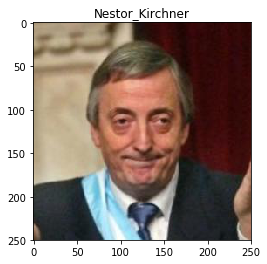

In [19]:
# Randomly Select Face

import numpy as np
data_np = np.array(data)
print(data_np.shape)
import matplotlib.pyplot as plt

query_index = np.random.randint(labels.shape[0])

distances = (np.linalg.norm(data_np[query_index:query_index+1]- data_np, axis=1))
closest_matches = np.argsort(distances)[1:20]

num_matches_in_database = len(np.where(true_labels[query_index])[0])

print(num_matches_in_database, 'examples in dataset for this class')

query = labels.iloc[query_index][1]
plt.title(query.split('/')[-2])

plt.imshow(plt.imread(query[:-4]+'.jpg'))

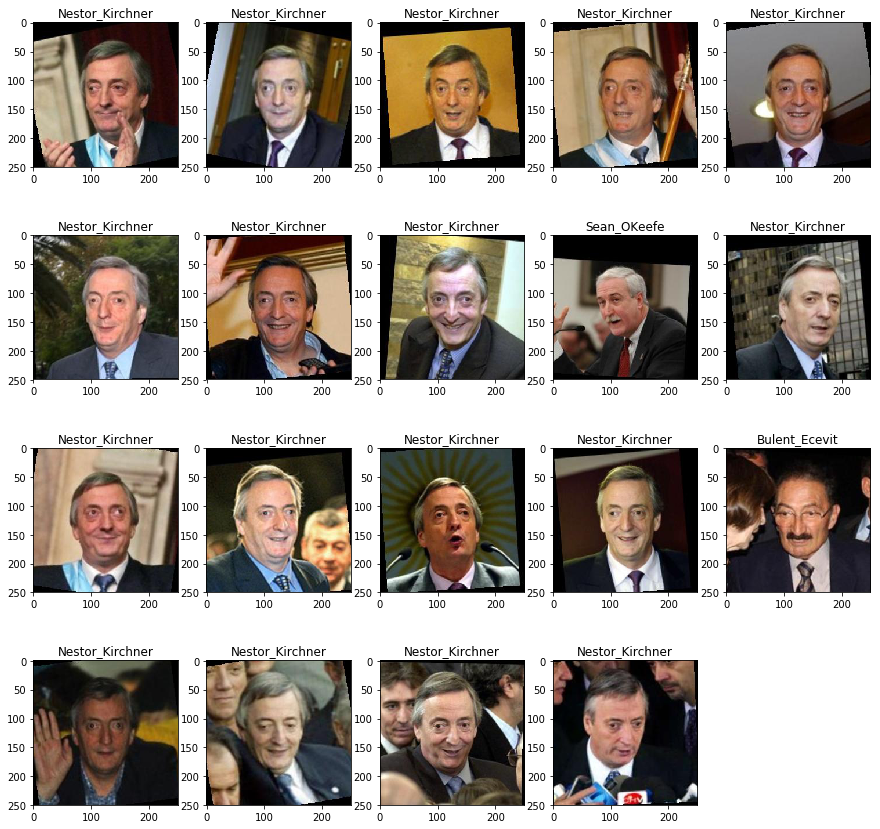

In [20]:
# Closest 20 Matches

plt.figure(figsize=(15,15))

n_columns = 5
n_rows = len(closest_matches)//5 + 1

for i, closest_match in enumerate(closest_matches):
    plt.subplot(n_rows, n_columns, i+1)
    match = labels.iloc[closest_match][1]
    plt.title(match.split('/')[-2])
    plt.imshow(plt.imread(match[:-4]+'.jpg'))

### 3. Compute Distances for All Vectors

In [21]:
data_np_32 = data_np.astype(np.float32)
data_np_16 = data_np.astype(np.float16)

In [22]:
def compute_distances_no_loops(X):
    dists = -2 * np.dot(X, X.T) + np.sum(X**2,    axis=1) + np.sum(X**2, axis=1)[:, np.newaxis]
    return dists
import time

start = time.time()

distances = compute_distances_no_loops(data_np)
# run your code
end = time.time()
elapsed = end - start
print('Took', elapsed, 'seconds to compute mutual distances between 13233 vectors.')
print(elapsed/(13233**2), 'seconds per embedding pair')


Took 2.4962069988250732 seconds to compute mutual distances between 13233 vectors.
1.4254893320622822e-08 seconds per embedding pair


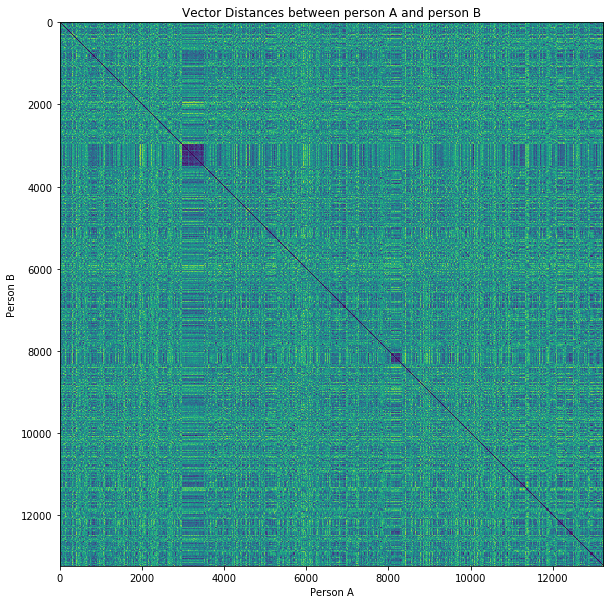

In [23]:
plt.figure(figsize=(10,10))

plt.xlabel('Person A')
plt.ylabel('Person B')
plt.title('Vector Distances between person A and person B')

plt.imshow(distances )


# plt.imsave('img', distances)

### 4. Take Threshold

If average squared distance between embeddings is less than this threshold, it's a match.

In [24]:
# Choose a threshold here 
THRESHOLD = 0.5

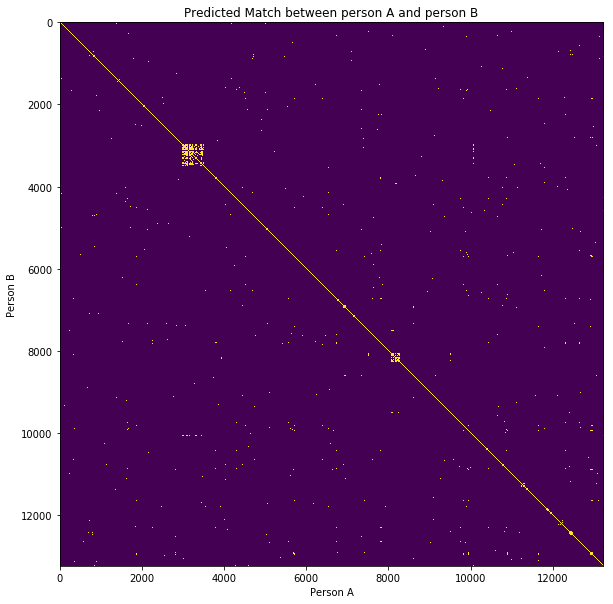

In [25]:
plt.figure(figsize=(10,10))
plt.xlabel('Person A')
plt.ylabel('Person B')
plt.title('Predicted Match between person A and person B')
plt.imshow(distances<THRESHOLD )

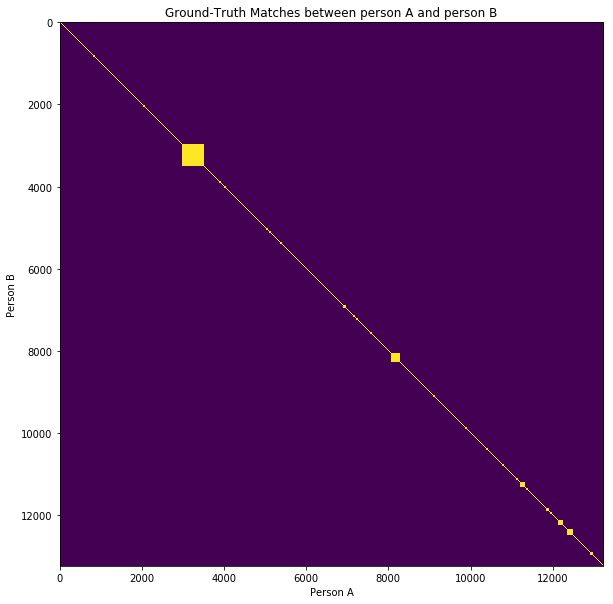

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.xlabel('Person A')
plt.ylabel('Person B')
plt.title('Ground-Truth Matches between person A and person B')
plt.imshow(true_labels)

### 6. False Positives

number of false positives: 318464.0


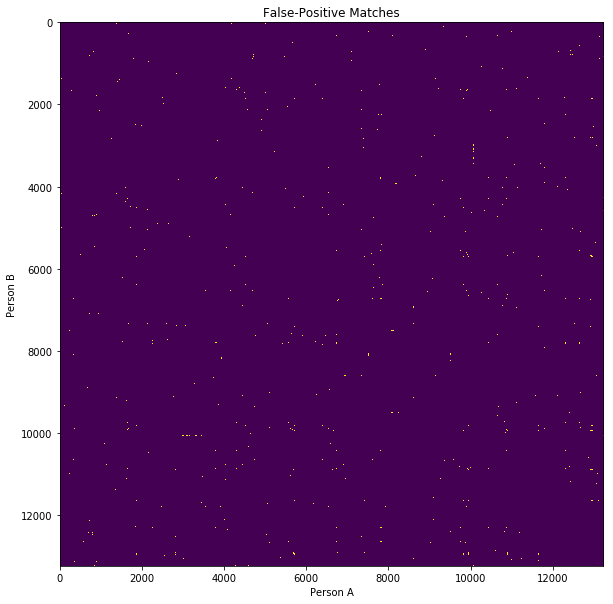

In [30]:
false_positives = (1 - true_labels) * (distances<THRESHOLD)
number_of_false_positives = np.sum(false_positives)
print('number of false positives:', number_of_false_positives)
plt.figure(figsize=(10,10))
plt.xlabel('Person A')
plt.ylabel('Person B')
plt.title('False-Positive Matches')
plt.imshow(false_positives)
coords = np.where(false_positives==1)
del false_positives

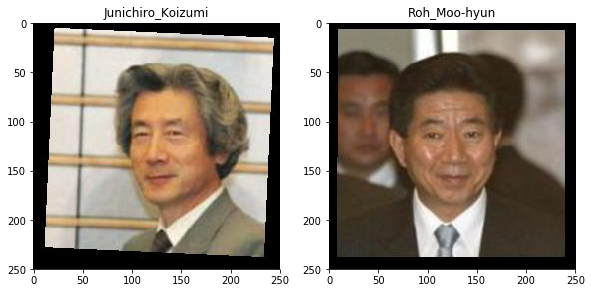

In [31]:
# Examples of false positives
choice = np.random.randint(len(coords[0]))

index_a = coords[0][choice]
index_b = coords[1][choice]
plt.figure(figsize = (15,15))
plt.subplot(1,3,1)
query = labels.iloc[index_a][1]
plt.title(query.split('/')[-2])

plt.imshow(plt.imread(query[:-4]+'.jpg'))
plt.subplot(1,3,2)
query = labels.iloc[index_b][1]
plt.title(query.split('/')[-2])

plt.imshow(plt.imread(query[:-4]+'.jpg'))

### 7. False Negatives

Number of false negatives: 236630.0


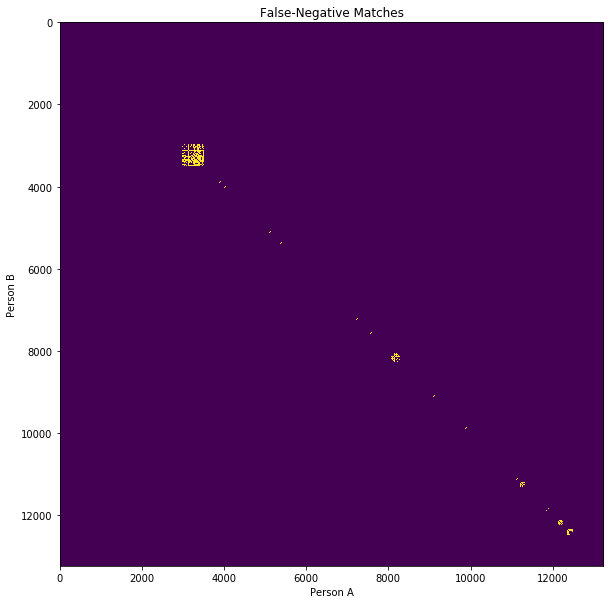

In [35]:
false_negatives = true_labels - true_labels * (distances<THRESHOLD)
number_of_false_negatives = np.sum(false_negatives)
print('Number of false negatives:', number_of_false_negatives)
plt.figure(figsize=(10,10))
plt.xlabel('Person A')
plt.ylabel('Person B')
plt.title('False-Negative Matches')
plt.imshow(false_negatives)
coords = np.where(false_negatives==1)
del false_negatives

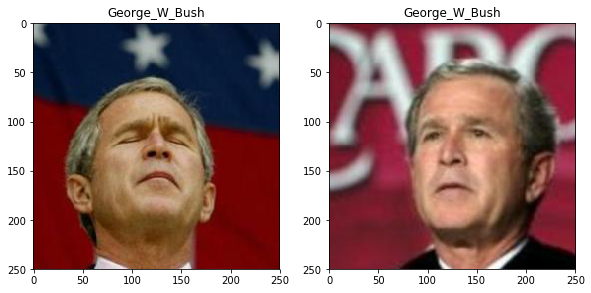

In [36]:
# Examples of false negatives
choice = np.random.randint(len(coords[0]))

index_a = coords[0][choice]
index_b = coords[1][choice]
plt.figure(figsize = (15,15))
plt.subplot(1,3,1)
query = labels.iloc[index_a][1]
plt.title(query.split('/')[-2])

plt.imshow(plt.imread(query[:-4]+'.jpg'))
plt.subplot(1,3,2)
query = labels.iloc[index_b][1]
plt.title(query.split('/')[-2])

plt.imshow(plt.imread(query[:-4]+'.jpg'))